# Unsupervised Learning & Association Rule Mining (k-means clustering)
---
**Name: Varsha.S**
---

### Import all necessary libraries

In [3]:
# ==============================================================
# SECTION 1: IMPORTS
# ==============================================================

# Basic libraries for data handling and numerical operations
import numpy as np                  # For numerical operations
import pandas as pd                 # For handling the dataset

# For plotting and visualization
import matplotlib.pyplot as plt     # For creating scatter plots, etc.
import seaborn as sns               # For enhanced visualizations

# For scaling/normalization
from sklearn.preprocessing import MinMaxScaler  # To normalize data attributes

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# For displaying dataframes neatly in Jupyter
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Data preprocessing

In [5]:
# ==============================================================
# SECTION 2: LOAD AND INSPECT DATA
# ==============================================================

# Load the dataset
# Note: Replace the filename with the correct path if needed
df = pd.read_csv('cricketers.csv', sep='\t')

# Display first few rows to verify correct loading
print("🔹 First 5 rows of the dataset:")
display(df.head())

# Display basic info to understand data structure and types
print("\n🔹 Dataset Information:")
print(df.info())

# Check for missing values
print("\n🔹 Checking for missing values:")
print(df.isnull().sum())

# Shape of the dataset (rows, columns)
print("\n🔹 Dataset shape:", df.shape)

# Display column names for reference
print("\n🔹 Columns in dataset:")
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()
print(df.columns.tolist())


🔹 First 5 rows of the dataset:


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.750,144.000,0,0.000,0,0,0.000,0.000
1,AB de Villiers,12,11,480,90,275,53.330,174.540,0,0.000,0,0,0.000,0.000
2,Abhishek Sharma,3,3,63,46,33,63.000,190.900,0,0.000,0,0,0.000,0.000
3,Ajinkya Rahane,15,14,370,65,313,28.460,118.210,0,0.000,0,0,0.000,0.000
4,Alex Hales,6,6,148,45,118,24.660,125.420,0,0.000,0,0,0.000,0.000



🔹 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER                    109 non-null    object 
 1   matches_played            109 non-null    int64  
 2   innings_batted            109 non-null    int64  
 3   runs_scored               109 non-null    int64  
 4   highest_runs              109 non-null    int64  
 5   balls_faced               109 non-null    int64  
 6   average_runs              109 non-null    float64
 7   strike_rate               109 non-null    float64
 8   innings_bowled            109 non-null    int64  
 9   overs                     109 non-null    float64
 10  runs_given                109 non-null    int64  
 11  wickets_obtained          109 non-null    int64  
 12  average_runs_per_wicket   109 non-null    float64
 13  bowling_economy           109 non-null   

### Data Normalization

In [7]:
# ==============================================================
# SECTION 3: DATA NORMALIZATION  (Question 1)
# ==============================================================

# Create a copy of the dataframe (excluding player names for normalization)
df_numeric = df.drop(columns=['PLAYER'])

# Initialize the MinMaxScaler to scale values between 0 and 1
scaler = MinMaxScaler()

# Fit and transform the numeric data
df_scaled = scaler.fit_transform(df_numeric)

# Convert the scaled data back to a DataFrame with original column names
df_normalized = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Concatenate the PLAYER column back to the normalized data for reference
df_normalized = pd.concat([df['PLAYER'], df_normalized], axis=1)

# Display first few rows of normalized dataset
print("🔹 First 5 rows of the normalized dataset:")
display(df_normalized.head())


🔹 First 5 rows of the normalized dataset:


,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,0.588,0.529,0.182,0.359,0.194,0.221,0.480,0.000,0.000,0.000,0.000,0.000,0.000
1,AB de Villiers,0.706,0.647,0.653,0.703,0.533,0.703,0.582,0.000,0.000,0.000,0.000,0.000,0.000
2,Abhishek Sharma,0.176,0.176,0.086,0.359,0.064,0.831,0.636,0.000,0.000,0.000,0.000,0.000,0.000
3,Ajinkya Rahane,0.882,0.824,0.503,0.508,0.607,0.375,0.394,0.000,0.000,0.000,0.000,0.000,0.000
4,Alex Hales,0.353,0.353,0.201,0.352,0.229,0.325,0.418,0.000,0.000,0.000,0.000,0.000,0.000


### K-means clustering algorithm from scratch

Converged after 2 iterations for k = 2.


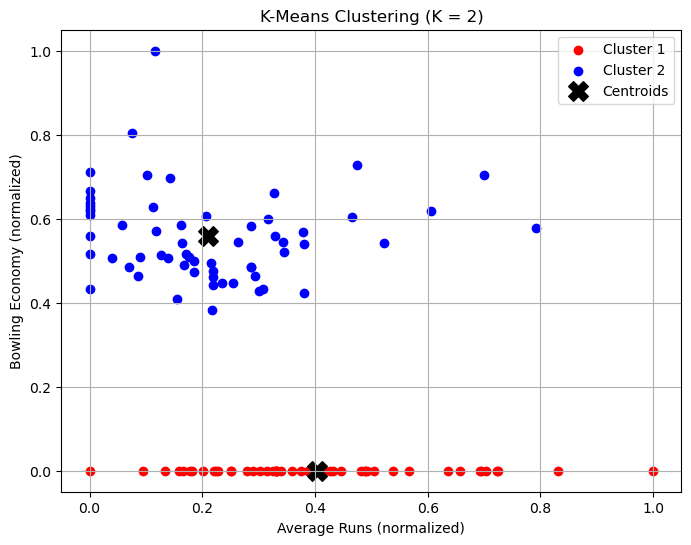

In [9]:
# ==============================================================
# SECTION 4: K-MEANS FROM SCRATCH (Question 2)
# ==============================================================

# Select only the two normalized features for clustering
X = df_normalized[['average_runs', 'bowling_economy']].values

# --------------------------------------------------------------
# Step 1: Define helper functions for K-means
# --------------------------------------------------------------

def initialize_centroids(X, k):
    """
    Randomly select k data points as initial centroids
    """
    np.random.seed(42)  # for reproducibility
    random_indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[random_indices]
    return centroids

def compute_distances(X, centroids):
    """
    Compute Euclidean distance between each data point and each centroid
    Formula:
       d(x, c) = sqrt(sum((x_j - c_j)^2))
    """
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
         # Compute squared differences for each feature
        squared_diff = (X - centroid) ** 2
        
        # Sum across all features (axis=1) and take square root
        distances[:, i] = np.sqrt(np.sum(squared_diff, axis=1))
    return distances

def assign_clusters(distances):
    """
    Assign each data point to the nearest centroid
    """
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """
    Compute new centroids as the mean of all points in each cluster
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    """
    K-Means Clustering Algorithm (from scratch)

    Steps:
    1. Initialize centroids randomly.
    2. Repeat until convergence or maximum iterations:
       a. Compute the distance between each data point and each centroid.
       b. Assign each data point to the nearest centroid.
       c. Update centroids as the mean of all assigned points.
       d. Check for convergence — if centroids do not change significantly, stop.
    """
    
    # Step 1: Initialize centroids
    centroids = initialize_centroids(X, k)

    for i in range(max_iters):
        # Save current centroids for convergence check later
        old_centroids = centroids.copy()
        
        # Step 2a: Compute distances from data points to all centroids
        distances = compute_distances(X, centroids)
        
        # Step 2b: Assign points to nearest centroid (form clusters)
        labels = assign_clusters(distances)
        
        # Step 2c: Recompute centroids as the mean of assigned points
        centroids = update_centroids(X, labels, k)
        
        # Step 2d: Check for convergence (if centroids stop moving)
        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converged after {i+1} iterations for k = {k}.")
            break
    
    # Return final centroids and cluster labels
    return centroids, labels

# --------------------------------------------------------------
# Step 2: Run K-means with K=2
# --------------------------------------------------------------

k = 2
centroids, labels = k_means(X, k)

# --------------------------------------------------------------
# Step 3: Plot the clusters
# --------------------------------------------------------------

plt.figure(figsize=(8, 6))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], color='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], color='blue', label='Cluster 2')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')

# Add labels and title
plt.title('K-Means Clustering (K = 2)')
plt.xlabel('Average Runs (normalized)')
plt.ylabel('Bowling Economy (normalized)')
plt.legend()
plt.grid(True)
plt.show()


### K = 2 Clustering Interpretation

The scatter plot shows two distinct clusters of players based on **Average Runs** (x-axis) and **Bowling Economy** (y-axis).

* **Cluster 1 (Red):** Moderate batting averages, little/no bowling — likely specialist batsmen.
* **Cluster 2 (Blue):** Lower batting averages, higher bowling economy — likely bowlers or bowling all-rounders.

**Summary:**
K-Means with K = 2 effectively separates players by skill focus (batting vs bowling), with centroids representing the mean characteristics of each group.


### K-means for different K values (2,3,4,5)

Converged after 2 iterations for k = 2.
Converged after 8 iterations for k = 3.
Converged after 9 iterations for k = 4.
Converged after 9 iterations for k = 5.


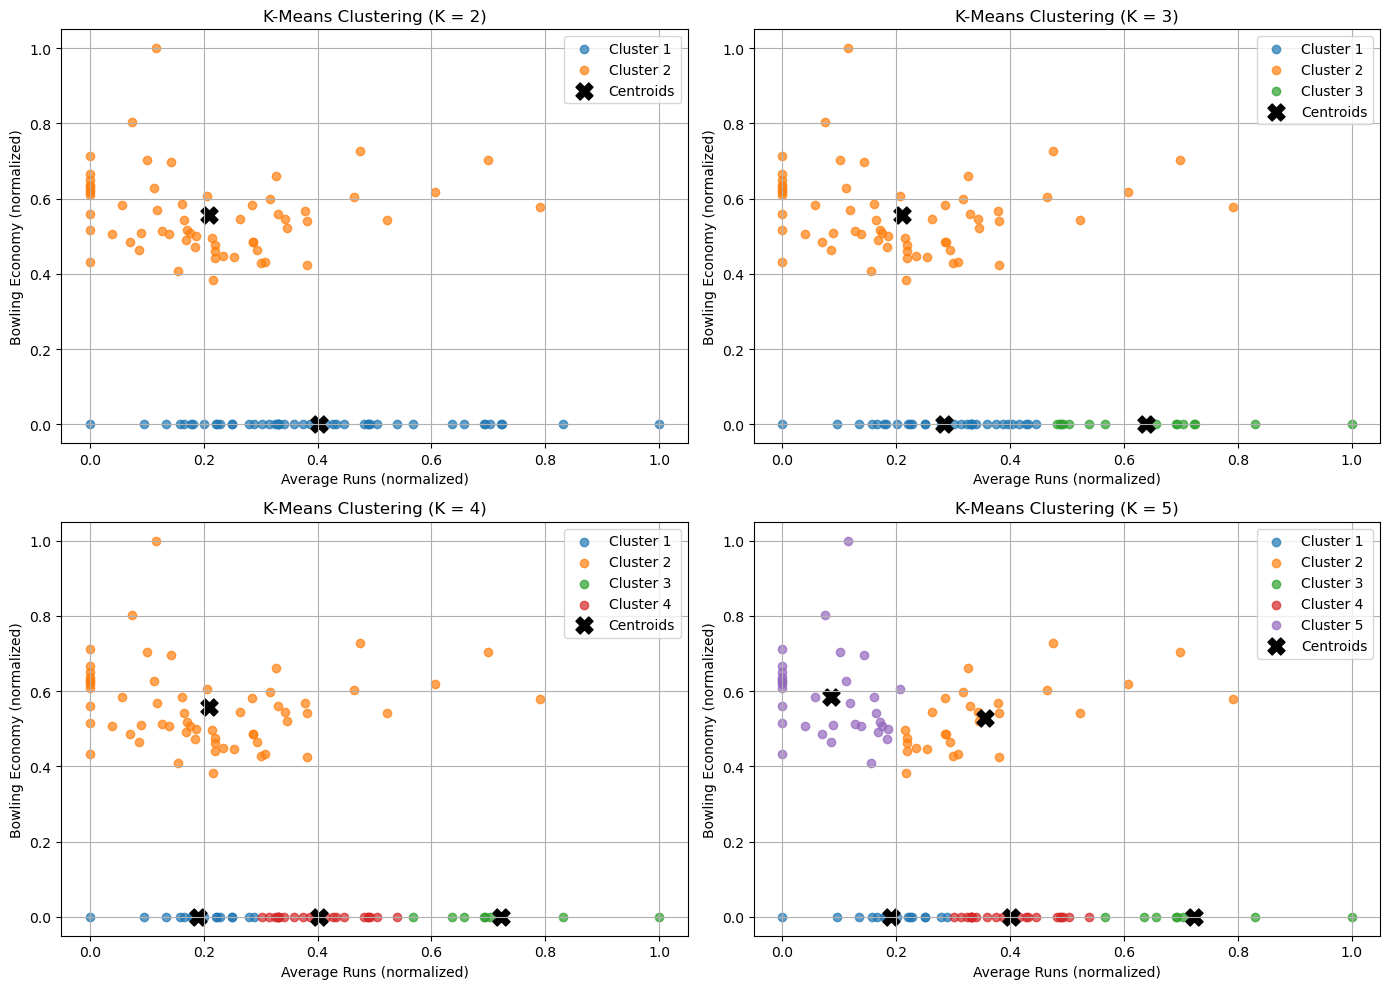

Converged after 2 iterations for k = 2.
🔹 Centroids for K=2:
[[0.40266605 0.        ]
 [0.21004923 0.55770492]]


Converged after 8 iterations for k = 3.
🔹 Centroids for K=3:
[[0.28458394 0.        ]
 [0.21004923 0.55770492]
 [0.63883028 0.        ]]


Converged after 9 iterations for k = 4.
🔹 Centroids for K=4:
[[0.19053145 0.        ]
 [0.21004923 0.55770492]
 [0.72261638 0.        ]
 [0.40190586 0.        ]]


Converged after 9 iterations for k = 5.
🔹 Centroids for K=5:
[[0.19053145 0.        ]
 [0.35592773 0.52738095]
 [0.72261638 0.        ]
 [0.40190586 0.        ]
 [0.08627352 0.58343434]]




In [12]:
# ==============================================================
# SECTION 5: K-MEANS FOR DIFFERENT K VALUES
# ==============================================================

# Select only the two normalized features for clustering
X = df_normalized[['average_runs', 'bowling_economy']].values

# List of K values to experiment with
k_values = [2, 3, 4, 5]

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easy iteration

for idx, k in enumerate(k_values):
    # Run K-means
    centroids, labels = k_means(X, k)
    
    # Select subplot
    ax = axes[idx]
    
    # Plot clusters
    for cluster_id in range(k):
        ax.scatter(X[labels == cluster_id, 0], X[labels == cluster_id, 1], label=f'Cluster {cluster_id+1}', alpha=0.7)
    
    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=150, label='Centroids')
    
    # Set title and labels
    ax.set_title(f'K-Means Clustering (K = {k})')
    ax.set_xlabel('Average Runs (normalized)')
    ax.set_ylabel('Bowling Economy (normalized)')
    ax.grid(True)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print centroids for each K
for k in k_values:
    centroids, labels = k_means(X, k)
    print(f"🔹 Centroids for K={k}:")
    print(centroids)
    print("\n")


### K-Means Clustering Observations

- **K = 2:** Clean separation between batting- and bowling-oriented players — most intuitive.
- **K = 3:** Splits batting players into two clusters; adds detail but some overlap exists.
- **K = 4:** Three batting clusters start overlapping; visualization less clear.
- **K = 5:** Clusters uneven and granular; harder to interpret.

**Conclusion:**  
K = 2 is best for simple and clear clustering; K = 3 is acceptable for slightly more detail. K = 4–5 over-segments without meaningful visual benefit.
